# Домашнее задание №2. Вариант 12.

## Задание 1

На маркетплейсе есть огромный объем данных содержащий записи о продажах различных продуктов. Наша цель — рассчитать общий доход, полученный от каждого продукта за определённый период. 

Необходимо решить задачу через классический python, numpy и numpy с использованием векторизации


Данные: 
* `products = ['автомобиль HAVAL', 'обувь', 'одежда', 'телефоны']` (при решении через numpy необходимо представить это в виде `np.array()`)
* `prices = [20000, 3000, 45600, 5000]` (при решении через numpy необходимо представить это в виде `np.array()` ) 

Данные о продажах необходимо сгенерировать самостоятельно и вывести в одном параграфов в ноутбуке, ниже приведен пример генерации случайных значений 

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
import seaborn as sns
from typing import List, Dict

VAR = 12 # Вариант
np.random.seed(42)
sns.set_style('darkgrid')

In [2]:
def generate_sales(variant: int, size: int) -> List: 
    return [random.randint(0, variant + 100) for i in range(size)]

In [3]:
products = ['автомобиль HAVAL', 'обувь', 'одежда', 'телефоны']
prices = [20000, 3000, 45600, 5000]
sales = [sum(generate_sales(VAR, 100_000)) for _ in range(len(products))]

### Решение через классический Python

In [4]:
def revenue_python(prices: List, sales: List) -> List:
    revenue = [price * sale for price, sale in zip(prices, sales)]
    return revenue

In [5]:
%%timeit
revenue_p = revenue_python(prices, sales)

308 ns ± 6.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [6]:
revenue_p = dict(zip(products, revenue_python(prices, sales)))
print(revenue_p)

{'автомобиль HAVAL': 112093040000, 'обувь': 16823247000, 'одежда': 255166291200, 'телефоны': 27991855000}


### Решение через NumPy

In [7]:
products = np.array(products)
prices = np.array(prices)
sales = np.array(sales)

In [8]:
def revenue_numpy(prices: npt.ArrayLike, sales: npt.ArrayLike) -> np.ndarray:
    revenue = np.array([price * sale for price, sale in zip(prices, sales)])
    return revenue

In [9]:
%%timeit
revenue_np = revenue_numpy(prices, sales)

1.05 µs ± 4.48 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [10]:
revenue_np = dict(zip(products, revenue_numpy(prices, sales)))
print(revenue_np)

{'автомобиль HAVAL': 112093040000, 'обувь': 16823247000, 'одежда': 255166291200, 'телефоны': 27991855000}


### Решение через NumPy с использованием векторизации

In [11]:
products = np.array(products)
prices = np.array(prices)
sales = np.array(sales)

In [12]:
def revenue_numpy_vec(prices: npt.ArrayLike, sales: npt.ArrayLike) -> np.ndarray:
    return prices * sales

In [13]:
%%timeit
revenue_npv = revenue_numpy_vec(prices, sales)

277 ns ± 1.55 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [14]:
revenue_npv = dict(zip(products, revenue_numpy_vec(prices, sales)))
print(revenue_npv)

{'автомобиль HAVAL': 112093040000, 'обувь': 16823247000, 'одежда': 255166291200, 'телефоны': 27991855000}


### Вывод

Применение Numpy с использованием векторизации дало наиблее быыстрый результат

## Задание 2

Необходимо написать с использованием numpy реализацию алгоритма **quicksort**

Сравнить скорость выполнения этих алгоритмов на чистом python, вашей реализации и numpy.sort() 

In [15]:
array = np.random.randint(0, 1000, size=10 ** 6)

### Реализация на чистом Python

In [16]:
def quicksort_py(arr: npt.ArrayLike) -> np.ndarray:
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        less = [x for x in arr[1:] if x <= pivot]
        greater = [x for x in arr[1:] if x > pivot]
        return quicksort_py(less) + [pivot] + quicksort_py(greater)

In [17]:
%%timeit
quicksort_py(array)

23.7 s ± 49.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Реализация с ипользованием NumPy

In [18]:
def quicksort_npy(arr: npt.ArrayLike) -> np.ndarray:
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        less = arr[1:][arr[1:] <= pivot]
        greater = arr[1:][arr[1:] > pivot]
        return np.concatenate((quicksort_npy(less), [pivot], quicksort_npy(greater)))

In [19]:
%%timeit 
quicksort_npy(array)

3.68 s ± 37.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Функция np.sort()

In [20]:
%%timeit
np.sort(array)

32.6 ms ± 47 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Задание 3

У нас есть данные о потреблении алкоголя о потреблнеии Алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

* country: Название страны
* beer_servings: Количество потребляемого пива в стране
* spirit_servings: Количество потребляемых крепких спиртных напитков в стране
* wine_servings: Количество потребляемого вина в стране
* total_litres_of_pure_alcohol: Общее количество потребляемого чистого алкоголя в литрах в стране

Давайте представим эти данные в виде структурированных массивов и определим, где же люди пьют больше вина, пива и других спиртных напитков.

In [21]:
data = np.genfromtxt('drinks.csv', delimiter=',', dtype=None, names=True, encoding='utf-8')
cols = data.dtype.names

In [22]:
data[:5]

array([('Afghanistan',   0,   0,   0,  0. ),
       ('Albania',  89, 132,  54,  4.9), ('Algeria',  25,   0,  14,  0.7),
       ('Andorra', 245, 138, 312, 12.4), ('Angola', 217,  57,  45,  5.9)],
      dtype=[('country', '<U28'), ('beer_servings', '<i8'), ('spirit_servings', '<i8'), ('wine_servings', '<i8'), ('total_litres_of_pure_alcohol', '<f8')])

In [23]:
cols

('country',
 'beer_servings',
 'spirit_servings',
 'wine_servings',
 'total_litres_of_pure_alcohol')

In [24]:
def top_drinking(arr: npt.ArrayLike, col: str, top: int) -> np.ndarray:
    return np.sort(arr, order=col)[::-1][['country', col]][:top]

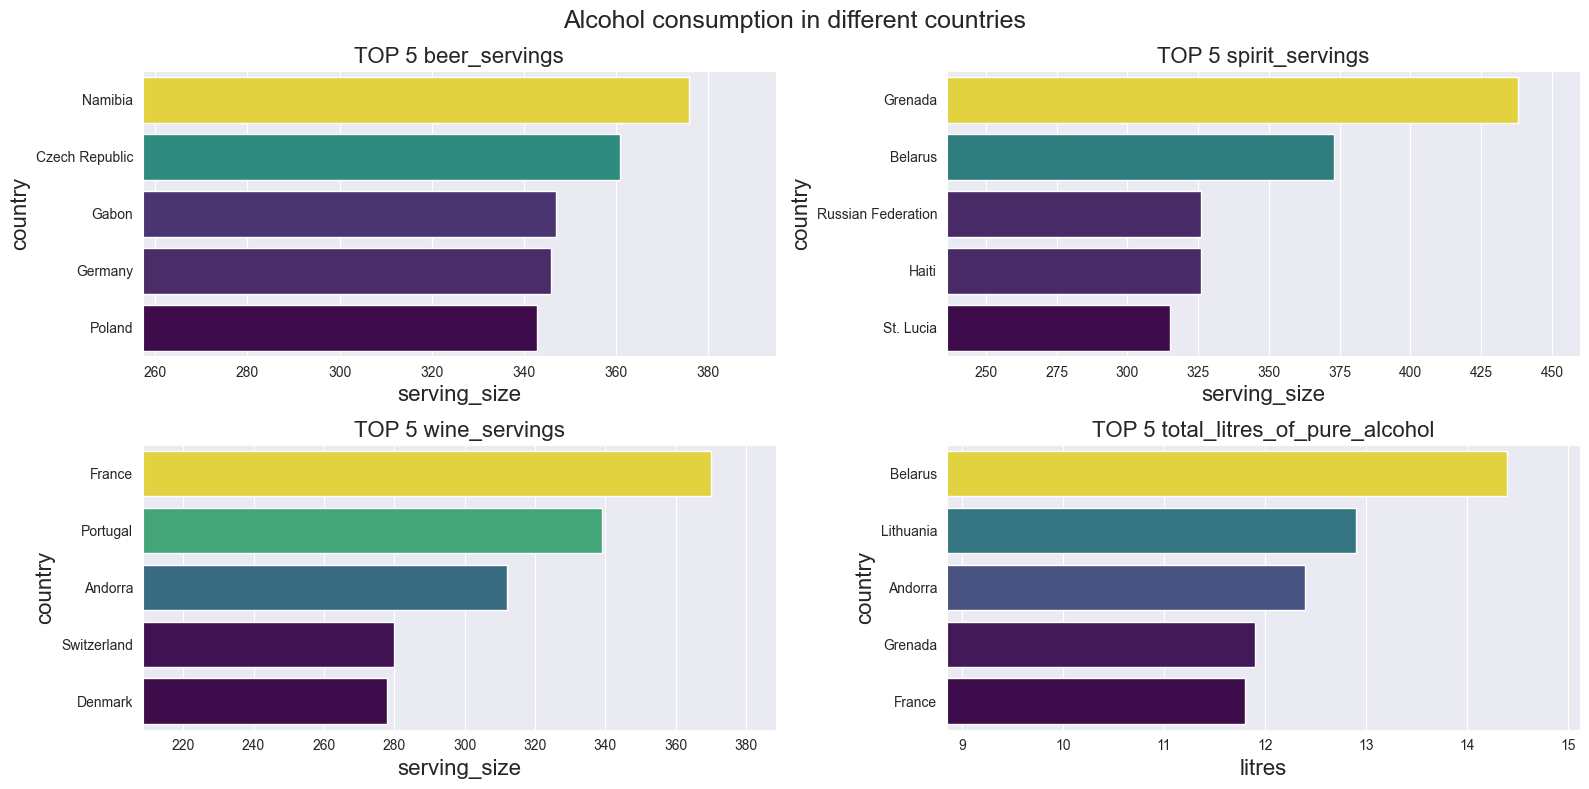

In [25]:
plt.figure(figsize=(16, 8))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Alcohol consumption in different countries', fontsize=18)

for i, col in enumerate(cols[1:]):
    countries, values = zip(*top_drinking(data, col, 5))
    ax = plt.subplot(2, 2, i + 1)
    sns.barplot(x=values, y=countries, hue=values, legend=False, ax=ax, palette='viridis')
    ax.set_title(f'TOP 5 {col}', fontsize=16)
    ax.set_ylabel('country', fontsize=16)
    ax.set_xlabel('litres', fontsize=16) if col == 'total_litres_of_pure_alcohol' else ax.set_xlabel('serving_size', fontsize=16)
    ax.set_xlim(min(values) * 0.75, max(values) * 1.05)
    

plt.tight_layout()
plt.show()

## Задание 4

У нас есть Полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Давайте представим эти данные в виде структурированных массивов и определим:

- число проклятий, летальных исходов и их отношение по фильмам 

- частота употребления конкретных прокрятий 

- распределение времени между проклятиями 

In [26]:
data = np.genfromtxt('tarantino.csv', delimiter=',', dtype=None, names=True, encoding='utf-8')

* movie:	Film title
* type:	Whether the event was a profane word or a death
* word:	The specific profane word, if the event was a word
* minutes_in:	The number of minutes into the film the event occurred

In [27]:
data[:5]

array([('Reservoir Dogs', 'word', 'dick', 0.4 ),
       ('Reservoir Dogs', 'word', 'dicks', 0.43),
       ('Reservoir Dogs', 'word', 'fucked', 0.55),
       ('Reservoir Dogs', 'word', 'fucking', 0.61),
       ('Reservoir Dogs', 'word', 'bullshit', 0.61)],
      dtype=[('movie', '<U19'), ('type', '<U5'), ('word', '<U13'), ('minutes_in', '<f8')])

In [28]:
movies = np.unique(data['movie'])
movies

array(['Django Unchained', 'Inglorious Basterds', 'Jackie Brown',
       'Kill Bill: Vol. 1', 'Kill Bill: Vol. 2', 'Pulp Fiction',
       'Reservoir Dogs'], dtype='<U19')

### Число проклятий, летальных исходов и их отношение по фильмам 

In [29]:
for movie in movies:
    movie_data = data[data['movie'] == movie]
    curses = np.sum(movie_data['type'] == 'word')
    deaths = np.sum(movie_data['type'] == 'death')
    ratio = curses / deaths
    print(f'Фильм {movie}, Количество проклятий: {curses}, Количество смертей: {deaths}, Проклятия/Смерти: {ratio:.2f}')

Фильм Django Unchained, Количество проклятий: 262, Количество смертей: 47, Проклятия/Смерти: 5.57
Фильм Inglorious Basterds, Количество проклятий: 58, Количество смертей: 48, Проклятия/Смерти: 1.21
Фильм Jackie Brown, Количество проклятий: 368, Количество смертей: 4, Проклятия/Смерти: 92.00
Фильм Kill Bill: Vol. 1, Количество проклятий: 57, Количество смертей: 63, Проклятия/Смерти: 0.90
Фильм Kill Bill: Vol. 2, Количество проклятий: 69, Количество смертей: 11, Проклятия/Смерти: 6.27
Фильм Pulp Fiction, Количество проклятий: 469, Количество смертей: 7, Проклятия/Смерти: 67.00
Фильм Reservoir Dogs, Количество проклятий: 421, Количество смертей: 10, Проклятия/Смерти: 42.10


### Частота употребления конкретных прокрятий

In [30]:
curses_words = np.unique(data['word'])
curses_words

array(['', 'ass', 'asses', 'asshead', 'asshole', 'assholes', 'bastard',
       'bastards', 'bitch', 'bitches', 'bullshit', 'chickenshit',
       'cockblockery', 'cocksucker', 'cunt', 'cunts', 'damn', 'damned',
       'dick', 'dickless', 'dicks', 'dumbass', 'faggot', 'fuck', 'fucked',
       'fucker', 'fuckers', 'fuckface', 'fuckhead', 'fucking', 'fucks',
       'fuckup', 'goddamn', 'goddamned', 'gook', 'gooks', 'hell',
       'horeshit', 'horseshit', 'jackass', 'jap', 'japs', 'jew (verb)',
       'merde', 'motherfucker', 'motherfuckers', 'motherfucking',
       'n-word ', 'negro ', 'pussy', 'shit', 'shithead', 'shitless',
       'shitload', 'shittiest', 'shitting', 'shitty', 'slope', 'slut',
       'squaw', 'wetback'], dtype='<U13')

In [31]:
curse_count = {}

for curse in curses_words:
    freq = np.sum(data['word'] == curse)
    curse_count[curse] = freq

curse_count = dict(sorted(curse_count.items(), key=lambda item: item[1], reverse=True))
print(curse_count)

{'fucking': 407, 'shit': 221, 'fuck': 213, '': 190, 'n-word ': 179, 'ass': 140, 'goddamn': 113, 'motherfucker': 70, 'bitch': 64, 'hell': 45, 'damn': 37, 'motherfucking': 27, 'fucked': 25, 'bullshit': 15, 'motherfuckers': 15, 'dick': 14, 'pussy': 11, 'asshole': 10, 'bastard': 10, 'bitches': 9, 'fucker': 8, 'assholes': 5, 'dicks': 5, 'negro ': 5, 'asses': 4, 'shitty': 4, 'damned': 3, 'fucks': 3, 'shithead': 3, 'cocksucker': 2, 'cunt': 2, 'gooks': 2, 'horseshit': 2, 'japs': 2, 'shitload': 2, 'wetback': 2, 'asshead': 1, 'bastards': 1, 'chickenshit': 1, 'cockblockery': 1, 'cunts': 1, 'dickless': 1, 'dumbass': 1, 'faggot': 1, 'fuckers': 1, 'fuckface': 1, 'fuckhead': 1, 'fuckup': 1, 'goddamned': 1, 'gook': 1, 'horeshit': 1, 'jackass': 1, 'jap': 1, 'jew (verb)': 1, 'merde': 1, 'shitless': 1, 'shittiest': 1, 'shitting': 1, 'slope': 1, 'slut': 1, 'squaw': 1}


<Axes: >

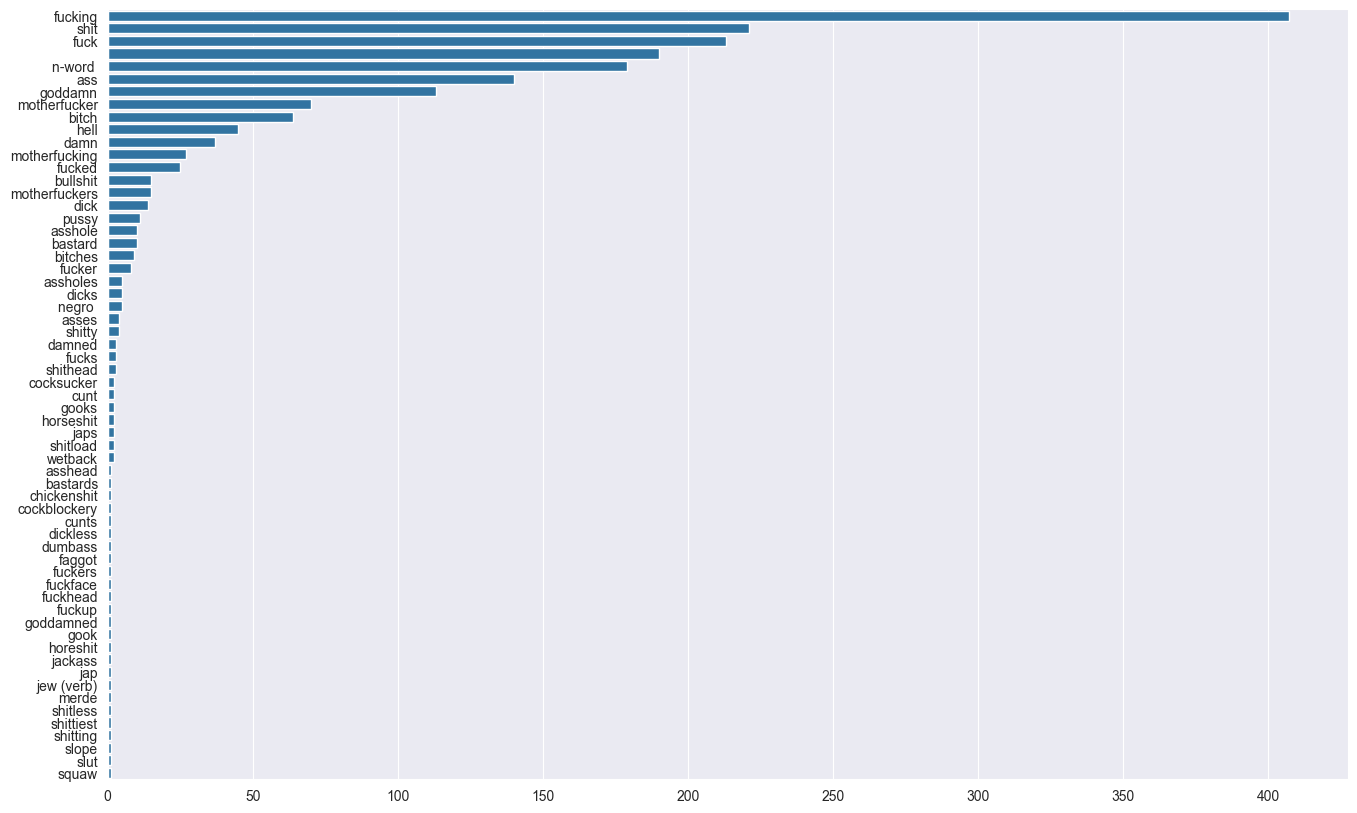

In [32]:
plt.figure(figsize=(16, 10))
sns.barplot(curse_count, orient='h')

### Распределение времени между проклятиями 

In [33]:
time = []
for movie in movies:
    movie_data = data[data['movie'] == movie]
    time.extend(np.diff(movie_data['minutes_in']))
time = np.array(time)

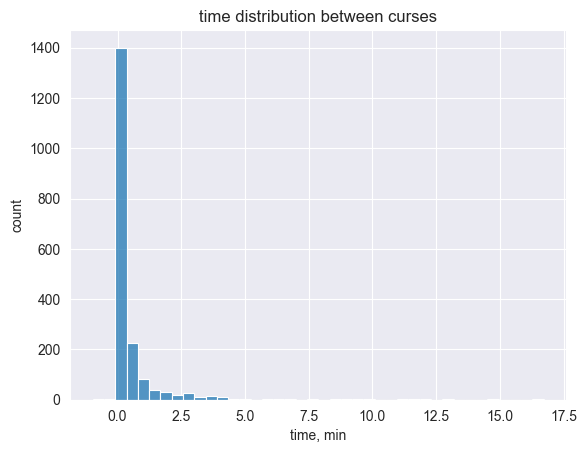

In [40]:
sns.histplot(time, bins=40)
plt.title('time distribution between curses')
plt.xlabel('time, min')
plt.ylabel('count')
plt.show()

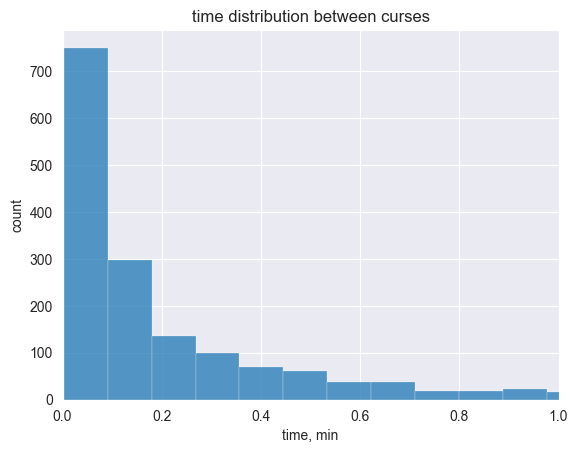

In [44]:
sns.histplot(time, bins=200)
plt.title('time distribution between curses')
plt.xlabel('time, min')
plt.ylabel('count')
plt.xlim(0, 1)
plt.show()